In [ ]:
###
# Demand Simulation Validation

# This notebook validates the simulated demand data:
#   - Seasonal cover patterns
#   - Dish-level aggregation consistency
#   - Dessert probability behaviour
# ###

import pandas as pd
import matplotlib.pyplot as plt

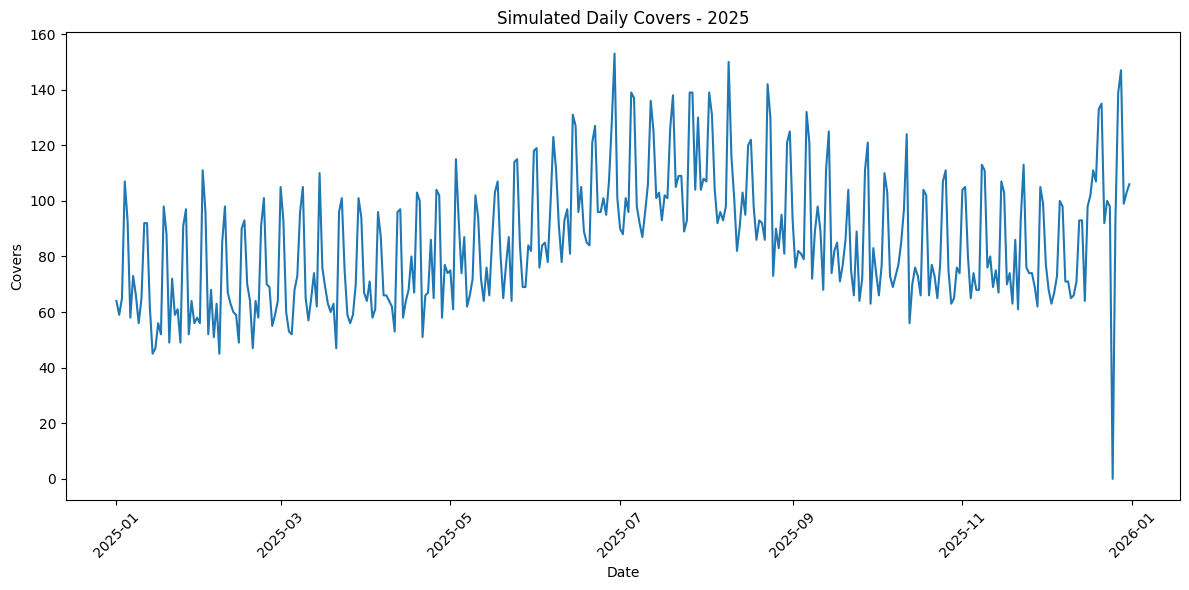

In [56]:
# Load data
covers = pd.read_csv("../data/raw/covers_history.csv",
                      parse_dates=['date'])
daily_dishes = pd.read_csv("../data/raw/daily_dishes.csv",
                      parse_dates=['date'])


# Plot and check covers_history.csv data 
plt.figure(figsize=(12, 6))
plt.plot(covers['date'], covers['covers'])
plt.title("Simulated Daily Covers - 2025")
plt.xlabel("Date")
plt.ylabel("Covers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total number of mains equals total number of covers. Check OK.
Average dessert %:  0.355


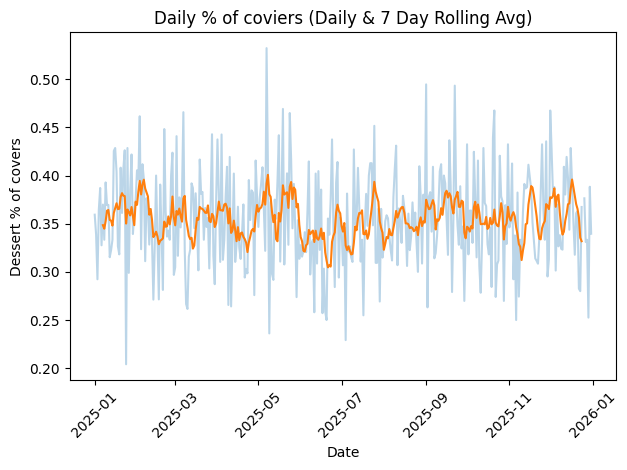

In [60]:
# --- VERIFY MATCHING COUNTS FOR MAINS AND COVERS ---

daily_dishes['total_mains'] = (
    daily_dishes['grilled_lamb_cutlets'] 
    + daily_dishes['spanakopita'] 
    + daily_dishes['chicken_pesto_skewers']
    + daily_dishes['ropa_vieja'])

if (covers['covers'] == daily_dishes['total_mains']).all():
    print("Total number of mains equals total number of covers. Check OK.")
else:
    print("Revise data and check your code.")


# --- DESSERT PROBABILITY CHECK AND PLOTS ---

# Get percentage of dessert orders
daily_dishes['dessert_pct'] = (daily_dishes['cheesecake'] 
                             / covers['covers'])

print("Average dessert %: ", round(daily_dishes['dessert_pct'].mean(), 3))

# 7 day rolling average for desserts
daily_dishes['dessert_pct_7d'] = (
    daily_dishes['dessert_pct'].rolling(window=7).mean()
)

# Plot dessert orders
plt.figure()

# Plot raw daily percentage
plt.plot(daily_dishes['date'],
        daily_dishes['dessert_pct'],
        alpha=0.3)

# Plot 7 day rolling average 
plt.plot(daily_dishes['date'],
         daily_dishes['dessert_pct_7d'])

plt.title("Daily % of coviers (Daily & 7 Day Rolling Avg)")
plt.xlabel("Date")
plt.ylabel("Dessert % of covers")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
###
# Conclusion 
#   -Simulation structure behaves as expected
#   -Seasonal patterns propagate correctly to dish-level demand
#   -Dessert probability remains stable (~35%)
#
# Next step: Convert dish demand into ingredient-level weekly orders
###